In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Data Preprocessing


In [2]:
# Load the dataset
df = pd.read_csv("CWC23_all_innings.csv")
df

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.750000,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.50,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.750000,v India,Lucknow,29-Oct-23,10.0,2.0,4.50,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05,0.800000,v England,Ahmedabad,5-Oct-23,10.0,1.0,4.80,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05,0.816667,v Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.90,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05,0.816667,v Pakistan,Chennai,23-Oct-23,10.0,0.0,4.90,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,NZ,MJ Santner (NZ),bowl,60,51,0.0,0.00,0.850000,v India,Wankhede,15-Nov-23,10.0,1.0,5.10,1,NaN,NaN,NaN,NaN,NaN
1404,AUS,A Zampa (AUS),bowl,42,55,0.0,0.00,1.309524,v South Africa,Eden Gardens,16-Nov-23,7.0,0.0,7.85,1,NaN,NaN,NaN,NaN,NaN
1405,NZ,R Ravindra (NZ),bowl,42,60,0.0,0.00,1.428571,v India,Wankhede,15-Nov-23,7.0,0.0,8.57,1,NaN,NaN,NaN,NaN,NaN
1406,IND,RA Jadeja (IND),bowl,60,63,0.0,0.00,1.050000,v New Zealand,Wankhede,15-Nov-23,10.0,0.0,6.30,2,NaN,NaN,NaN,NaN,NaN


In [3]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             1408 non-null   object 
 1   player           1408 non-null   object 
 2   bat_or_bowl      1408 non-null   object 
 3   bb_bf            1408 non-null   int64  
 4   runs             1408 non-null   int64  
 5   wkts             562 non-null    float64
 6   wicketball_prob  1408 non-null   float64
 7   runs_per_ball    1408 non-null   float64
 8   opposition       1408 non-null   object 
 9   ground           1408 non-null   object 
 10  start_date       1408 non-null   object 
 11  overs            562 non-null    float64
 12  mdns             562 non-null    float64
 13  econ             562 non-null    float64
 14  inns             1408 non-null   int64  
 15  4s               846 non-null    float64
 16  6s               846 non-null    float64
 17  sr            

In [4]:
# Check for null values in the dataset
null_values = df.isnull().sum()

In [5]:
# Display columns with null values, if any
print("Columns with null values:")
print(null_values[null_values > 0])

Columns with null values:
wkts       846
overs      846
mdns       846
econ       846
4s         562
6s         562
sr         562
not_out    562
mins       562
dtype: int64


In [6]:
# Check the unique values in the 'bat_or_bowl' column
print(df['bat_or_bowl'].unique())

['bowl' 'bat']


In [7]:
# Filter the dataset for records where players bowled
bowling_data = df[df['bat_or_bowl'] == 'bowl']


In [8]:
# Check for null values in the bowling data
bowling_null_values = bowling_data.isnull().sum()
print("Null values in bowling data:")
print(bowling_null_values[bowling_null_values > 0])

Null values in bowling data:
4s         562
6s         562
sr         562
not_out    562
mins       562
dtype: int64


In [9]:
# Filter the dataset for records where players batted
batting_data = df[df['bat_or_bowl'] == 'bat']

In [10]:
# Check for null values in the batting data
batting_null_values = batting_data.isnull().sum()
print("\nNull values in batting data:")
print(batting_null_values[batting_null_values > 0])


Null values in batting data:
wkts     846
overs    846
mdns     846
econ     846
dtype: int64


In [11]:
# Fill null values in bowling data with zeros using loc
df.loc[df['bat_or_bowl'] == 'bowl', ['4s', '6s', 'sr', 'not_out', 'mins']] = \
    df.loc[df['bat_or_bowl'] == 'bowl', ['4s', '6s', 'sr', 'not_out', 'mins']].fillna(0)


In [12]:
# Fill null values in batting data with zeros using loc
df.loc[df['bat_or_bowl'] == 'bat', ['wkts', 'overs', 'mdns', 'econ']] = \
    df.loc[df['bat_or_bowl'] == 'bat', ['wkts', 'overs', 'mdns', 'econ']].fillna(0)

In [13]:
df

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.750000,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.50,2,0.0,0.0,0.0,0.0,0.0
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.750000,v India,Lucknow,29-Oct-23,10.0,2.0,4.50,1,0.0,0.0,0.0,0.0,0.0
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05,0.800000,v England,Ahmedabad,5-Oct-23,10.0,1.0,4.80,1,0.0,0.0,0.0,0.0,0.0
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05,0.816667,v Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.90,1,0.0,0.0,0.0,0.0,0.0
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05,0.816667,v Pakistan,Chennai,23-Oct-23,10.0,0.0,4.90,1,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,NZ,MJ Santner (NZ),bowl,60,51,0.0,0.00,0.850000,v India,Wankhede,15-Nov-23,10.0,1.0,5.10,1,0.0,0.0,0.0,0.0,0.0
1404,AUS,A Zampa (AUS),bowl,42,55,0.0,0.00,1.309524,v South Africa,Eden Gardens,16-Nov-23,7.0,0.0,7.85,1,0.0,0.0,0.0,0.0,0.0
1405,NZ,R Ravindra (NZ),bowl,42,60,0.0,0.00,1.428571,v India,Wankhede,15-Nov-23,7.0,0.0,8.57,1,0.0,0.0,0.0,0.0,0.0
1406,IND,RA Jadeja (IND),bowl,60,63,0.0,0.00,1.050000,v New Zealand,Wankhede,15-Nov-23,10.0,0.0,6.30,2,0.0,0.0,0.0,0.0,0.0


In [14]:
# Check for null values in the dataset
null_values = df.isnull().sum()

In [15]:
# Display columns with null values, if any
print("Columns with null values:")
print(null_values[null_values > 0])

Columns with null values:
Series([], dtype: int64)


# Data Analysis


In [16]:
# Calculate total runs scored and wickets taken for each team
team_performance = df.groupby('team').agg({'runs': 'sum', 'wkts': 'sum', 'inns': 'count'})


In [17]:
# Calculate average runs scored and wickets taken per match
team_performance['avg_runs_per_match'] = team_performance['runs'] / team_performance['inns']
team_performance['avg_wkts_per_match'] = team_performance['wkts'] / team_performance['inns']


In [18]:
# Display team-wise performance metrics
print(team_performance)

      runs  wkts  inns  avg_runs_per_match  avg_wkts_per_match
team                                                          
AFG   4134  53.0   129           32.046512            0.410853
AUS   5234  77.0   155           33.767742            0.496774
BAN   4358  51.0   141           30.907801            0.361702
ENG   4396  65.0   151           29.112583            0.430464
IND   4783  94.0   124           38.572581            0.758065
NED   4268  63.0   157           27.184713            0.401274
NZ    5376  71.0   144           37.333333            0.493056
PAK   4786  65.0   128           37.390625            0.507812
SA    5097  88.0   141           36.148936            0.624113
SL    4366  50.0   138           31.637681            0.362319


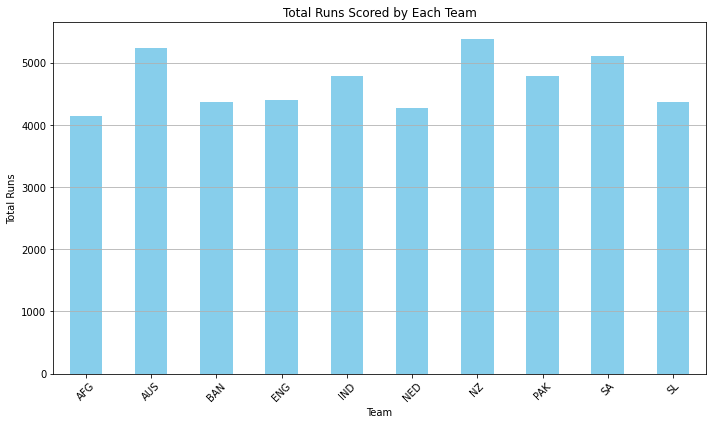

In [19]:
# Plotting total runs scored by each team
plt.figure(figsize=(10, 6))
team_performance['runs'].plot(kind='bar', color='skyblue')
plt.title('Total Runs Scored by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


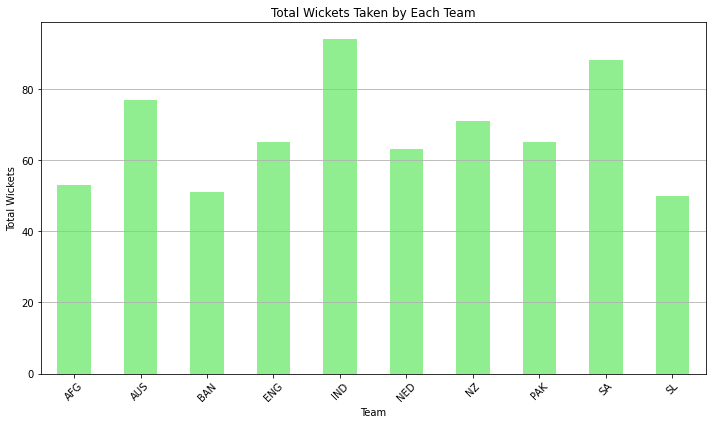

In [20]:
# Plotting total wickets taken by each team
plt.figure(figsize=(10, 6))
team_performance['wkts'].plot(kind='bar', color='lightgreen')
plt.title('Total Wickets Taken by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [21]:
# Batting statistics
batting_stats = df[df['bat_or_bowl'] == 'bat'].groupby('player').agg({
    'runs': 'sum',
    '4s': 'sum',
    '6s': 'sum',
    'sr': 'mean',
    'not_out': 'sum'
}).reset_index()

In [22]:
# Bowling statistics
bowling_stats = df[df['bat_or_bowl'] == 'bowl'].groupby('player').agg({
    'wkts': 'sum',
    'overs': 'sum',
    'mdns': 'sum',
    'econ': 'mean'
}).reset_index()

In [23]:
# Merging batting and bowling statistics
player_stats = pd.merge(batting_stats, bowling_stats, on='player', how='outer')


In [24]:
# Calculating batting average
player_stats['batting_avg'] = player_stats['runs'] / (player_stats['not_out'] + 1)


In [25]:
# Identifying leading run-scorers and wicket-takers
leading_run_scorers = player_stats.nlargest(10, 'runs')
leading_wicket_takers = player_stats.nlargest(10, 'wkts')


In [26]:
# Assessing impact on team's performance (Example: using batting average and economy rate)
player_stats['impact'] = (player_stats['batting_avg'] * 0.6) + ((1 / player_stats['econ']) * 0.4)


In [27]:
# Identifying top players based on impact
top_players = player_stats.nlargest(10, 'impact')


In [28]:
# Displaying the results
print("Leading Run-Scorers:")
print(leading_run_scorers[['player', 'runs']])
print("\nLeading Wicket-Takers:")
print(leading_wicket_takers[['player', 'wkts']])
print("\nTop Players Based on Impact:")
print(top_players[['player', 'impact']])

Leading Run-Scorers:
                     player   runs
142           V Kohli (IND)  711.0
104          Q de Kock (SA)  594.0
106         R Ravindra (NZ)  578.0
26         DJ Mitchell (NZ)  552.0
109         RG Sharma (IND)  550.0
24          DA Warner (AUS)  528.0
122           SS Iyer (IND)  526.0
39   HE van der Dussen (SA)  448.0
82           MR Marsh (AUS)  426.0
4           AK Markram (SA)  406.0

Leading Wicket-Takers:
                        player  wkts
91        Mohammed Shami (IND)  23.0
1                A Zampa (AUS)  22.0
22           D Madushanka (SL)  21.0
34              G Coetzee (SA)  20.0
53             JJ Bumrah (IND)  18.0
126  Shaheen Shah Afridi (PAK)  18.0
68               M Jansen (SA)  17.0
13          BFW de Leede (NED)  16.0
41            Haris Rauf (PAK)  16.0
78             MJ Santner (NZ)  16.0

Top Players Based on Impact:
                       player      impact
109           RG Sharma (IND)  330.047619
106           R Ravindra (NZ)  173.464068
59     

In [29]:
# Opposition Analysis
team_opposition_performance = df.groupby(['team', 'opposition']).agg({
    'runs': 'sum',
    'wkts': 'sum'
}).reset_index()

In [30]:
# Ground Analysis
team_ground_performance = df.groupby(['team', 'ground']).agg({
    'runs': 'sum',
    'wkts': 'sum'
}).reset_index()


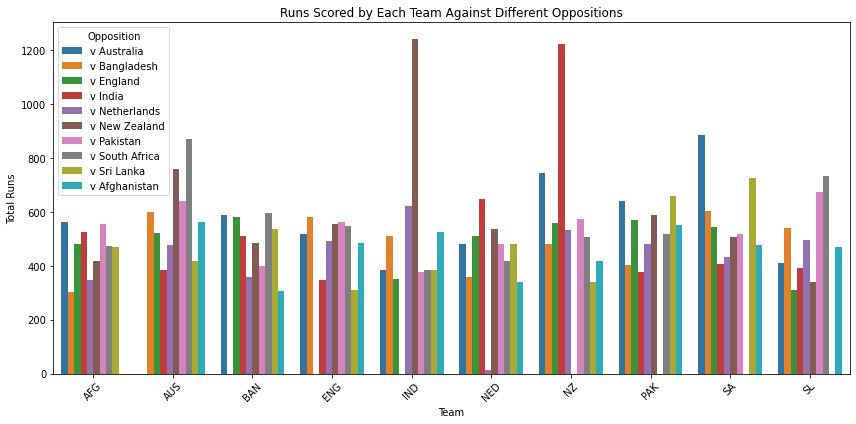

In [31]:
# Visualization: Opposition Analysis
plt.figure(figsize=(12, 6))
sns.barplot(x='team', y='runs', hue='opposition', data=team_opposition_performance)
plt.title('Runs Scored by Each Team Against Different Oppositions')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.legend(title='Opposition')
plt.tight_layout()
plt.show()

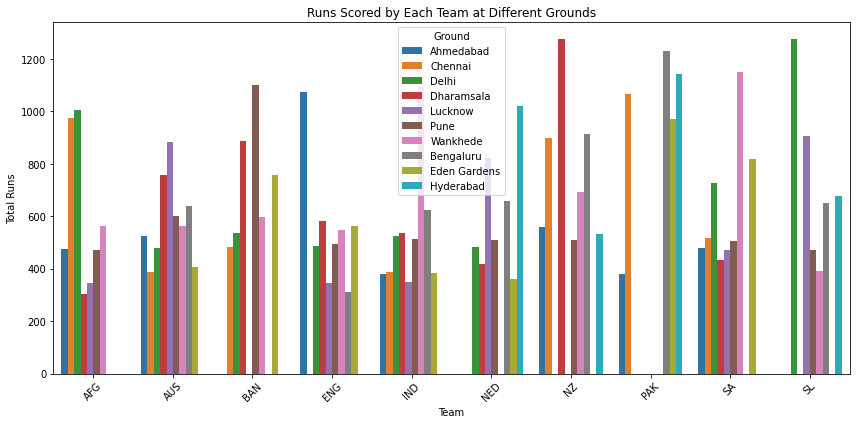

In [32]:
# Visualization: Ground Analysis
plt.figure(figsize=(12, 6))
sns.barplot(x='team', y='runs', hue='ground', data=team_ground_performance)
plt.title('Runs Scored by Each Team at Different Grounds')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.legend(title='Ground')
plt.tight_layout()
plt.show()

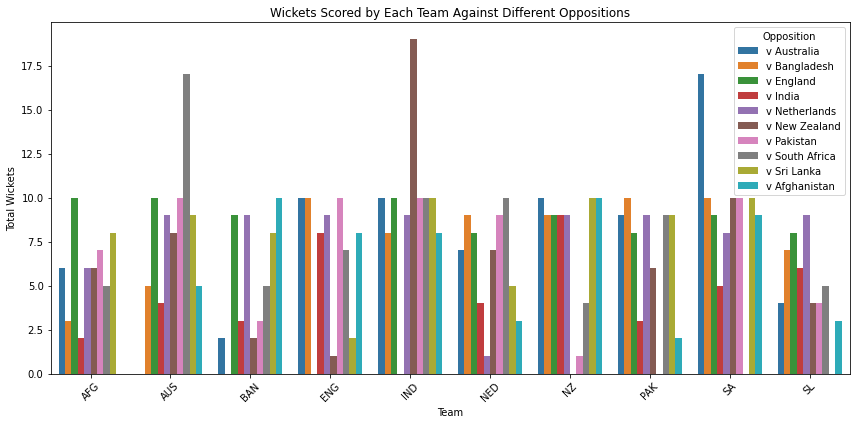

In [33]:
# Visualization: Opposition Analysis
plt.figure(figsize=(12, 6))
sns.barplot(x='team', y='wkts', hue='opposition', data=team_opposition_performance)
plt.title('Wickets Scored by Each Team Against Different Oppositions')
plt.xlabel('Team')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45)
plt.legend(title='Opposition')
plt.tight_layout()
plt.show()

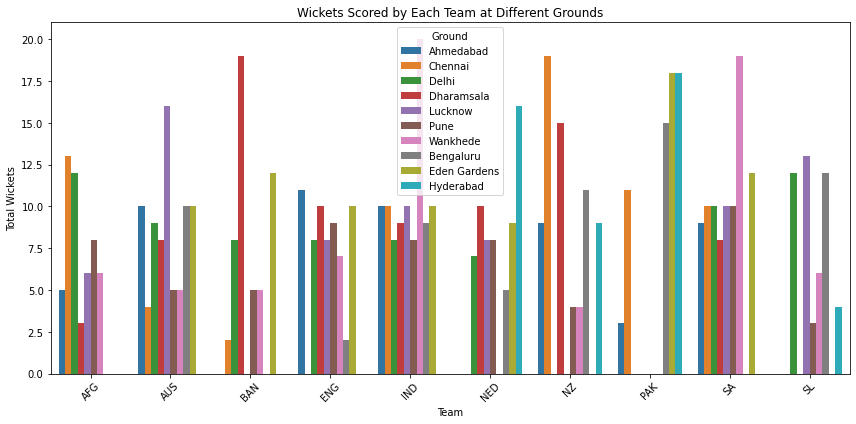

In [34]:
# Visualization: Ground Analysis
plt.figure(figsize=(12, 6))
sns.barplot(x='team', y='wkts', hue='ground', data=team_ground_performance)
plt.title('Wickets Scored by Each Team at Different Grounds')
plt.xlabel('Team')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45)
plt.legend(title='Ground')
plt.tight_layout()
plt.show()

In [35]:
# Convert 'start_date' column to datetime
df['start_date'] = pd.to_datetime(df['start_date'],  format="%d-%b-%y")


In [36]:
# Player Performance Over Time
player_performance_over_time = df.groupby(['start_date', 'player']).agg({
    'runs': 'sum',
    'wkts': 'sum'
}).reset_index()

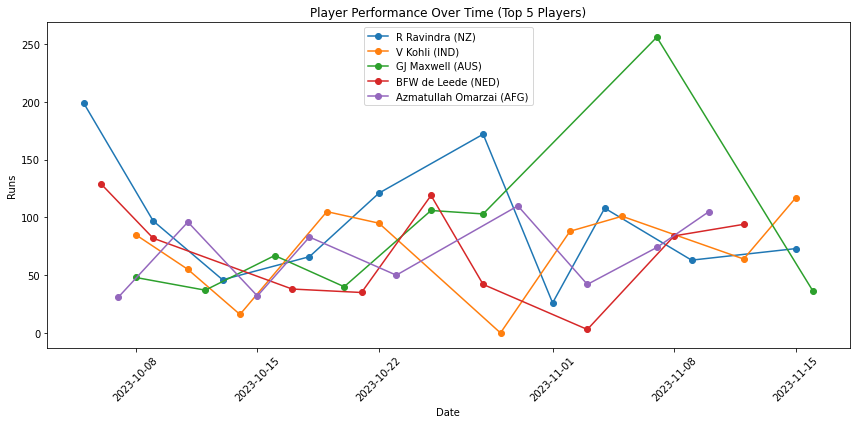

In [37]:
# Plotting Player Performance Over Time (Example: Top 5 Players)
top_players = player_performance_over_time.groupby('player').agg({'runs': 'sum'}).nlargest(5, 'runs').index
plt.figure(figsize=(12, 6))
for player in top_players:
    player_data = player_performance_over_time[player_performance_over_time['player'] == player]
    plt.plot(player_data['start_date'], player_data['runs'], label=player, marker='o')
plt.title('Player Performance Over Time (Top 5 Players)')
plt.xlabel('Date')
plt.ylabel('Runs')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

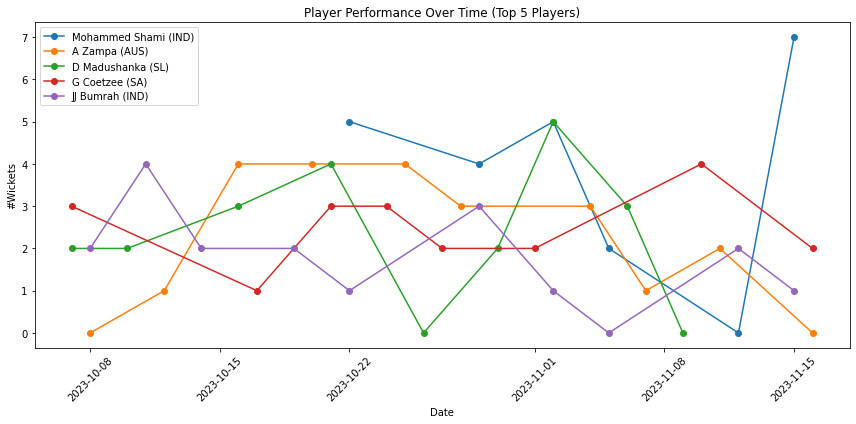

In [38]:
# Plotting Player Performance Over Time (Example: Top 5 Players)
top_players = player_performance_over_time.groupby('player').agg({'wkts': 'sum'}).nlargest(5, 'wkts').index
plt.figure(figsize=(12, 6))
for player in top_players:
    player_data = player_performance_over_time[player_performance_over_time['player'] == player]
    plt.plot(player_data['start_date'], player_data['wkts'], label=player, marker='o')
plt.title('Player Performance Over Time (Top 5 Players)')
plt.xlabel('Date')
plt.ylabel('Wickets')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Machine Learning

# For Runs


In [39]:
X = df.select_dtypes(include='number').drop(columns=['runs'])
y = df['runs']

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [45]:
# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)


In [46]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


In [47]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [48]:
# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

In [49]:
# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [50]:
# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [51]:
# Make predictions on the testing set using the best model
predictions = best_model.predict(X_test_scaled)


In [52]:
mse = mean_squared_error(y_test, predictions)
print("Best Model Mean Squared Error:", mse)
print("Best Model Parameters:", best_params)

Best Model Mean Squared Error: 4.427055319148937
Best Model Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


# Evaluating

In [53]:
X

,bb_bf,wkts,wicketball_prob,runs_per_ball,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,60,3.0,0.05,0.750000,10.0,0.0,4.50,2,0.0,0.0,0.0,0.0,0.0
1,60,3.0,0.05,0.750000,10.0,2.0,4.50,1,0.0,0.0,0.0,0.0,0.0
2,60,3.0,0.05,0.800000,10.0,1.0,4.80,1,0.0,0.0,0.0,0.0,0.0
3,60,3.0,0.05,0.816667,10.0,0.0,4.90,1,0.0,0.0,0.0,0.0,0.0
4,60,3.0,0.05,0.816667,10.0,0.0,4.90,1,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,60,0.0,0.00,0.850000,10.0,1.0,5.10,1,0.0,0.0,0.0,0.0,0.0
1404,42,0.0,0.00,1.309524,7.0,0.0,7.85,1,0.0,0.0,0.0,0.0,0.0
1405,42,0.0,0.00,1.428571,7.0,0.0,8.57,1,0.0,0.0,0.0,0.0,0.0
1406,60,0.0,0.00,1.050000,10.0,0.0,6.30,2,0.0,0.0,0.0,0.0,0.0


In [54]:
i=1

In [55]:
df.iloc[i]

team                               ENG
player                 DJ Willey (ENG)
bat_or_bowl                       bowl
bb_bf                               60
runs                                45
wkts                               3.0
wicketball_prob                   0.05
runs_per_ball                     0.75
opposition                     v India
ground                         Lucknow
start_date         2023-10-29 00:00:00
overs                             10.0
mdns                               2.0
econ                               4.5
inns                                 1
4s                                 0.0
6s                                 0.0
sr                                 0.0
not_out                            0.0
mins                               0.0
Name: 1, dtype: object

In [56]:
X.iloc[i]

bb_bf              60.00
wkts                3.00
wicketball_prob     0.05
runs_per_ball       0.75
overs              10.00
mdns                2.00
econ                4.50
inns                1.00
4s                  0.00
6s                  0.00
sr                  0.00
not_out             0.00
mins                0.00
Name: 1, dtype: float64

In [57]:
y.iloc[i]

45

In [58]:
X_scaled = scaler.fit_transform(X)

In [59]:
sample_scaled = X_scaled[i].reshape(1, -1)

# Make predictions using the trained model
prediction = best_model.predict(sample_scaled)

print("Predicted runs:", prediction[0])


Predicted runs: 44.97


In [60]:
i = 3

In [61]:
df.iloc[i]

team                                NZ
player                LH Ferguson (NZ)
bat_or_bowl                       bowl
bb_bf                               60
runs                                49
wkts                               3.0
wicketball_prob                   0.05
runs_per_ball                 0.816667
opposition                v Bangladesh
ground                         Chennai
start_date         2023-10-13 00:00:00
overs                             10.0
mdns                               0.0
econ                               4.9
inns                                 1
4s                                 0.0
6s                                 0.0
sr                                 0.0
not_out                            0.0
mins                               0.0
Name: 3, dtype: object

In [62]:
X.iloc[i]

bb_bf              60.000000
wkts                3.000000
wicketball_prob     0.050000
runs_per_ball       0.816667
overs              10.000000
mdns                0.000000
econ                4.900000
inns                1.000000
4s                  0.000000
6s                  0.000000
sr                  0.000000
not_out             0.000000
mins                0.000000
Name: 3, dtype: float64

In [63]:
y.iloc[i]

49

In [64]:
sample_scaled = X_scaled[i].reshape(1, -1)

# Make predictions using the trained model
prediction = best_model.predict(sample_scaled)

print("Predicted runs:", prediction[0])


Predicted runs: 48.995


In [65]:
i = 20

In [66]:
df.iloc[i]

team                               IND
player             Kuldeep Yadav (IND)
bat_or_bowl                       bowl
bb_bf                               31
runs                                 7
wkts                               2.0
wicketball_prob               0.064516
runs_per_ball                 0.225806
opposition              v South Africa
ground                    Eden Gardens
start_date         2023-11-05 00:00:00
overs                              5.1
mdns                               1.0
econ                              1.35
inns                                 2
4s                                 0.0
6s                                 0.0
sr                                 0.0
not_out                            0.0
mins                               0.0
Name: 20, dtype: object

In [67]:
X.iloc[i]

bb_bf              31.000000
wkts                2.000000
wicketball_prob     0.064516
runs_per_ball       0.225806
overs               5.100000
mdns                1.000000
econ                1.350000
inns                2.000000
4s                  0.000000
6s                  0.000000
sr                  0.000000
not_out             0.000000
mins                0.000000
Name: 20, dtype: float64

In [68]:
y.iloc[i]

7

In [69]:
sample_scaled = X_scaled[i].reshape(1, -1)

# Make predictions using the trained model
prediction = best_model.predict(sample_scaled)

print("Predicted runs:", prediction[0])


Predicted runs: 6.885


In [70]:
import joblib

# Define the file path where you want to save the model
model_file_path = 'WorldCup2023_runs_best_model.pkl'

# Save the model to disk
joblib.dump(best_model, model_file_path)

print("Model saved successfully to:", model_file_path)


Model saved successfully to: WorldCup2023_runs_best_model.pkl


# For wkts

In [71]:
X = df.select_dtypes(include='number').drop(columns=['wkts'])
y = df['wkts']

In [72]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [76]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [77]:
# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)


In [78]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


In [79]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [80]:
# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

In [81]:
# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [82]:
# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [83]:
# Make predictions on the testing set using the best model
predictions = best_model.predict(X_test_scaled)


In [84]:
mse = mean_squared_error(y_test, predictions)
print("Best Model Mean Squared Error:", mse)
print("Best Model Parameters:", best_params)

Best Model Mean Squared Error: 0.031581648936170215
Best Model Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


# Evaluating

In [85]:
X

,bb_bf,runs,wicketball_prob,runs_per_ball,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,60,45,0.05,0.750000,10.0,0.0,4.50,2,0.0,0.0,0.0,0.0,0.0
1,60,45,0.05,0.750000,10.0,2.0,4.50,1,0.0,0.0,0.0,0.0,0.0
2,60,48,0.05,0.800000,10.0,1.0,4.80,1,0.0,0.0,0.0,0.0,0.0
3,60,49,0.05,0.816667,10.0,0.0,4.90,1,0.0,0.0,0.0,0.0,0.0
4,60,49,0.05,0.816667,10.0,0.0,4.90,1,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,60,51,0.00,0.850000,10.0,1.0,5.10,1,0.0,0.0,0.0,0.0,0.0
1404,42,55,0.00,1.309524,7.0,0.0,7.85,1,0.0,0.0,0.0,0.0,0.0
1405,42,60,0.00,1.428571,7.0,0.0,8.57,1,0.0,0.0,0.0,0.0,0.0
1406,60,63,0.00,1.050000,10.0,0.0,6.30,2,0.0,0.0,0.0,0.0,0.0


In [86]:
i=1

In [87]:
df.iloc[i]

team                               ENG
player                 DJ Willey (ENG)
bat_or_bowl                       bowl
bb_bf                               60
runs                                45
wkts                               3.0
wicketball_prob                   0.05
runs_per_ball                     0.75
opposition                     v India
ground                         Lucknow
start_date         2023-10-29 00:00:00
overs                             10.0
mdns                               2.0
econ                               4.5
inns                                 1
4s                                 0.0
6s                                 0.0
sr                                 0.0
not_out                            0.0
mins                               0.0
Name: 1, dtype: object

In [88]:
X.iloc[i]

bb_bf              60.00
runs               45.00
wicketball_prob     0.05
runs_per_ball       0.75
overs              10.00
mdns                2.00
econ                4.50
inns                1.00
4s                  0.00
6s                  0.00
sr                  0.00
not_out             0.00
mins                0.00
Name: 1, dtype: float64

In [89]:
y.iloc[i]

3.0

In [90]:
X_scaled = scaler.fit_transform(X)

In [91]:
sample_scaled = X_scaled[i].reshape(1, -1)

# Make predictions using the trained model
prediction = best_model.predict(sample_scaled)

print("Predicted runs:", prediction[0])


Predicted runs: 3.0


In [92]:
i = 3

In [93]:
df.iloc[i]

team                                NZ
player                LH Ferguson (NZ)
bat_or_bowl                       bowl
bb_bf                               60
runs                                49
wkts                               3.0
wicketball_prob                   0.05
runs_per_ball                 0.816667
opposition                v Bangladesh
ground                         Chennai
start_date         2023-10-13 00:00:00
overs                             10.0
mdns                               0.0
econ                               4.9
inns                                 1
4s                                 0.0
6s                                 0.0
sr                                 0.0
not_out                            0.0
mins                               0.0
Name: 3, dtype: object

In [94]:
X.iloc[i]

bb_bf              60.000000
runs               49.000000
wicketball_prob     0.050000
runs_per_ball       0.816667
overs              10.000000
mdns                0.000000
econ                4.900000
inns                1.000000
4s                  0.000000
6s                  0.000000
sr                  0.000000
not_out             0.000000
mins                0.000000
Name: 3, dtype: float64

In [95]:
y.iloc[i]

3.0

In [96]:
sample_scaled = X_scaled[i].reshape(1, -1)

# Make predictions using the trained model
prediction = best_model.predict(sample_scaled)

print("Predicted runs:", prediction[0])


Predicted runs: 3.0


In [97]:
i = 20

In [98]:
df.iloc[i]

team                               IND
player             Kuldeep Yadav (IND)
bat_or_bowl                       bowl
bb_bf                               31
runs                                 7
wkts                               2.0
wicketball_prob               0.064516
runs_per_ball                 0.225806
opposition              v South Africa
ground                    Eden Gardens
start_date         2023-11-05 00:00:00
overs                              5.1
mdns                               1.0
econ                              1.35
inns                                 2
4s                                 0.0
6s                                 0.0
sr                                 0.0
not_out                            0.0
mins                               0.0
Name: 20, dtype: object

In [99]:
X.iloc[i]

bb_bf              31.000000
runs                7.000000
wicketball_prob     0.064516
runs_per_ball       0.225806
overs               5.100000
mdns                1.000000
econ                1.350000
inns                2.000000
4s                  0.000000
6s                  0.000000
sr                  0.000000
not_out             0.000000
mins                0.000000
Name: 20, dtype: float64

In [100]:
y.iloc[i]

2.0

In [101]:
sample_scaled = X_scaled[i].reshape(1, -1)

# Make predictions using the trained model
prediction = best_model.predict(sample_scaled)

print("Predicted runs:", prediction[0])


Predicted runs: 2.06


In [102]:
import joblib

# Define the file path where you want to save the model
model_file_path = 'WorldCup2023_wkts_best_model.pkl'

# Save the model to disk
joblib.dump(best_model, model_file_path)

print("Model saved successfully to:", model_file_path)


Model saved successfully to: WorldCup2023_wkts_best_model.pkl
